# Er fødselsraten i Norge korrelert med konsumprisindeksen?

Prosjekt ikke fullført enda

Kilde: https://www.ssb.no/statbank/table/05531/tableViewLayout1/

In [10]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
sns.set_theme(style="darkgrid")

In [11]:
fold = 'C:/Users/Thomas/Documents/Python/fødsler'

In [12]:
#Importerer fødselstall
df = pd.read_excel('fødsler.xls')

df = df.drop(range(7))
df = df.reset_index(drop=True)
df.columns=["År", "Sum", "Jan", "Feb", "Mar", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Des"]

In [13]:
#Importerer konsumprisindeks
df2 = pd.read_excel('KPI.xlsx')

df2 = df2.drop(range(2))
df2 = df2.drop(df2.index[56:])
df2 = df2.reset_index(drop=True)
df2 = df2.drop(columns=["Unnamed: 1"])
df2.columns=["År", "Sum", "Jan", "Feb", "Mar", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Des"]

In [14]:
#Importerer tall med total befolkning
df3 = pd.read_excel("totalBefolkning.xlsx")

df3 = df3.drop(range(2))
df3 = df3.drop(df3.index[56:])
df3 = df3.reset_index(drop=True)
df3.columns = ["ÅrBef", "Befolkning"]

In [15]:
#Slår sammen fødselstall og total befolkning i samme dataframe
df = pd.concat([df, df3], axis=1)
df = df.drop(columns=["ÅrBef"])
df.head()

,År,Sum,Jan,Feb,Mar,Apr,Mai,Jun,Jul,Aug,Sep,Okt,Nov,Des,Befolkning
0,1967,67217,5375,5229,5950,6266,6094,5604,5499,5561,5667,5631,4921,5420,3768298
1,1968,68297,5389,5285,6042,6405,6192,5607,5589,5615,5801,5749,5138,5485,3800780
2,1969,68776,5757,5346,6243,6464,6153,5717,5728,5596,5784,5598,4966,5424,3832192
3,1970,65587,5459,5048,5951,6220,5706,5447,5395,5360,5450,5054,4964,5533,3863221
4,1971,66313,5422,5094,5948,6120,6115,5528,5525,5460,5605,5329,5071,5096,3888305


<Axes: xlabel='År'>

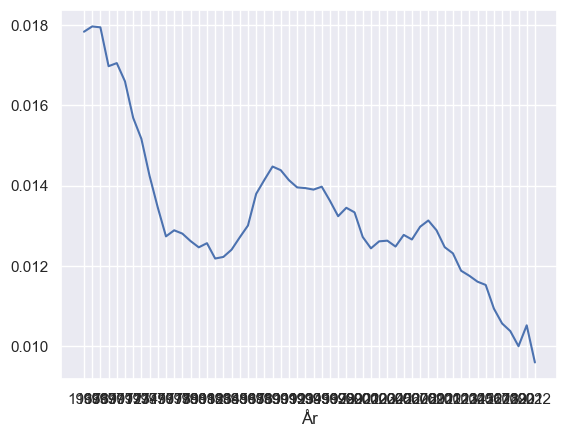

In [16]:
norm =df["Sum"]/df["Befolkning"]
sns.lineplot(data=df, x="År", y=norm)

<Axes: xlabel='År', ylabel='Sum'>

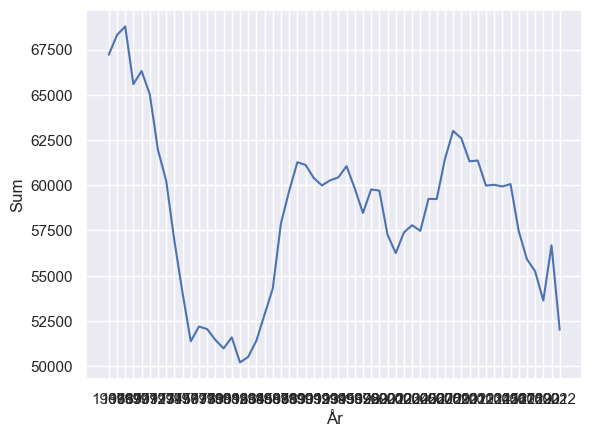

In [17]:
sns.lineplot(x="År", y="Sum", data=df)

<Axes: xlabel='År', ylabel='Sum'>

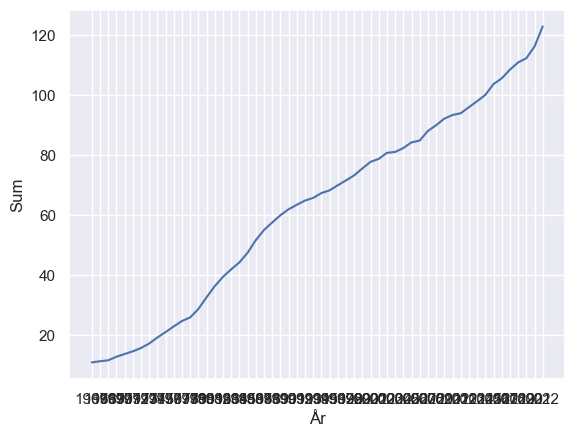

In [18]:
sns.lineplot(x="År", y="Sum", data=df2)

In [19]:
#x = pd.Series(df[df.columns[1]])
x = pd.Series(norm)
y = pd.Series(df2[df2.columns[1]])

x = x.astype('float32')
y = y.astype('float32')
#print(x)
#x.corr(y)
y.corr(x)

-0.7608216599875418

In [20]:
df=df.astype('float32')
df2=df2.astype('float32')

In [21]:
df[df.columns[2:13]].corr(numeric_only=True).round(1)

,Jan,Feb,Mar,Apr,Mai,Jun,Jul,Aug,Sep,Okt,Nov
Jan,1.0,0.9,0.8,0.9,0.9,0.9,0.8,0.8,0.9,0.9,0.9
Feb,0.9,1.0,0.9,0.9,0.9,0.8,0.7,0.7,0.9,0.8,0.9
Mar,0.8,0.9,1.0,0.9,0.8,0.7,0.5,0.6,0.8,0.7,0.8
Apr,0.9,0.9,0.9,1.0,0.9,0.7,0.6,0.6,0.8,0.8,0.8
Mai,0.9,0.9,0.8,0.9,1.0,0.9,0.8,0.8,0.9,0.9,0.9
Jun,0.9,0.8,0.7,0.7,0.9,1.0,0.9,1.0,0.9,0.9,0.9
Jul,0.8,0.7,0.5,0.6,0.8,0.9,1.0,1.0,0.9,0.9,0.8
Aug,0.8,0.7,0.6,0.6,0.8,1.0,1.0,1.0,0.9,0.9,0.8
Sep,0.9,0.9,0.8,0.8,0.9,0.9,0.9,0.9,1.0,0.9,0.9
Okt,0.9,0.8,0.7,0.8,0.9,0.9,0.9,0.9,0.9,1.0,0.9


In [22]:
df2.corrwith(df)

År            1.000000
Sum          -0.099135
Jan          -0.082472
Feb          -0.203736
Mar          -0.525056
Apr          -0.496955
Mai          -0.146849
Jun           0.168743
Jul           0.366905
Aug           0.313075
Sep           0.006189
Okt           0.046411
Nov          -0.098362
Des          -0.380567
Befolkning         NaN
dtype: float64

In [23]:
df[df.columns[2:13]].corrwith(df2[df2.columns[2:13]], numeric_only=True)

Jan   -0.082472
Feb   -0.203736
Mar   -0.525056
Apr   -0.496955
Mai   -0.146849
Jun    0.168743
Jul    0.366905
Aug    0.313075
Sep    0.006189
Okt    0.046411
Nov   -0.098362
dtype: float64

In [24]:
df[df.columns[2:13]].corr(numeric_only=True).round(1)

,Jan,Feb,Mar,Apr,Mai,Jun,Jul,Aug,Sep,Okt,Nov
Jan,1.0,0.9,0.8,0.9,0.9,0.9,0.8,0.8,0.9,0.9,0.9
Feb,0.9,1.0,0.9,0.9,0.9,0.8,0.7,0.7,0.9,0.8,0.9
Mar,0.8,0.9,1.0,0.9,0.8,0.7,0.5,0.6,0.8,0.7,0.8
Apr,0.9,0.9,0.9,1.0,0.9,0.7,0.6,0.6,0.8,0.8,0.8
Mai,0.9,0.9,0.8,0.9,1.0,0.9,0.8,0.8,0.9,0.9,0.9
Jun,0.9,0.8,0.7,0.7,0.9,1.0,0.9,1.0,0.9,0.9,0.9
Jul,0.8,0.7,0.5,0.6,0.8,0.9,1.0,1.0,0.9,0.9,0.8
Aug,0.8,0.7,0.6,0.6,0.8,1.0,1.0,1.0,0.9,0.9,0.8
Sep,0.9,0.9,0.8,0.8,0.9,0.9,0.9,0.9,1.0,0.9,0.9
Okt,0.9,0.8,0.7,0.8,0.9,0.9,0.9,0.9,0.9,1.0,0.9


In [25]:
df.corr(numeric_only=True)

,År,Sum,Jan,Feb,Mar,Apr,Mai,Jun,Jul,Aug,Sep,Okt,Nov,Des,Befolkning
År,1.000000,-0.117748,-0.104338,-0.235106,-0.553468,-0.516311,-0.158977,0.161844,0.363669,0.308023,-0.011613,0.032651,-0.114954,-0.405914,0.971454
Sum,-0.117748,1.000000,0.948496,0.938947,0.853583,0.886408,0.969258,0.937387,0.858696,0.885454,0.961212,0.945272,0.957667,0.908209,-0.121683
Jan,-0.104338,0.948496,1.000000,0.924830,0.824927,0.851025,0.910599,0.891262,0.804498,0.822963,0.891160,0.867442,0.873162,0.825809,-0.107662
Feb,-0.235106,0.938947,0.924830,1.000000,0.901124,0.887827,0.914131,0.819316,0.728340,0.747684,0.862687,0.826766,0.885276,0.882462,-0.245006
Mar,-0.553468,0.853583,0.824927,0.901124,1.000000,0.946182,0.839493,0.663916,0.501372,0.552441,0.760581,0.702201,0.809683,0.906247,-0.550949
Apr,-0.516311,0.886408,0.851025,0.887827,0.946182,1.000000,0.892294,0.722264,0.566308,0.605087,0.805815,0.759183,0.817756,0.908104,-0.492454
Mai,-0.158977,0.969258,0.910599,0.914131,0.839493,0.892294,1.000000,0.900767,0.820349,0.838302,0.906685,0.901399,0.905486,0.873438,-0.137711
Jun,0.161844,0.937387,0.891262,0.819316,0.663916,0.722264,0.900767,1.000000,0.938316,0.961432,0.927871,0.918735,0.886199,0.745764,0.172646
Jul,0.363669,0.858696,0.804498,0.728340,0.501372,0.566308,0.820349,0.938316,1.000000,0.958905,0.864768,0.877629,0.823004,0.633018,0.342183
Aug,0.308023,0.885454,0.822963,0.747684,0.552441,0.605087,0.838302,0.961432,0.958905,1.000000,0.908562,0.905690,0.845223,0.664823,0.299898


In [26]:
y.corr(x)

-0.7608216599875418

In [27]:
y.corr(x, method='kendall')

-0.5987012987012987

In [28]:
y.corr(x, method='spearman')

-0.7231715652768285